In [3]:
import os
from Utils.read_coord import kml_coord
from Utils.sentinal_request import senti_api
from Utils.forest_cover import get_cover,green_cover_plot
from Utils.seques_forecast import plot_SEQ,cal_existing
from Utils.map_view import map_show
from Utils.tree_count import count_trees
from Utils.tree_count import tree_count
import webbrowser

In [4]:
file_path = input('Enter kml file path: ')
print(file_path)
#C:\Users\Harith\EngenuityAI\SPE\SPE-development\sentinal\gAMPOLA TEST SITE 2.kml
if os.path.exists(file_path):
    print('The file exists')

    with open(file_path, 'r', encoding='utf-8-sig') as f:
        lines = f.readlines()

        #print(lines)
else:
    print('The specified file does NOT exist')
    
poly_coord = kml_coord(file_path)
#C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\Rubber Kalutara.kml

Enter kml file path: C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\Rubber Kalutara.kml
C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\Rubber Kalutara.kml
The file exists


In [5]:
img,resol = senti_api(poly_coord)

## NDVI calculation

In [6]:
from Utils.forest_cover import *

In [7]:
red = img[:, :, 2]
nir = img[:, :, 3]
ndvi = ndvi_api(red, nir)

## Green pixel calculation

In [8]:
import numpy as np
import numpy.ma as ma

In [21]:
l_thresh = 0.6
up_thresh = 0.8
res = 10

# get the ndvi data from masked array
ndvi_data = ma.getdata(ndvi).copy()
# get the row & col count
rows, cols = ndvi_data.shape

# replace ndvi values with 1, if ndvi >= threshold value
for i in range(0,rows):
    for j in range(0,cols):
     #   if ((ndvi_data[i][j] >= 0.88) and (ndvi_data[i][j] <= 0.92)):
        if ( ndvi_data[i][j] >= 0.8):
            ndvi_data[i][j] = 1
        else:
            ndvi_data[i][j] = 0

# count the ones
#ndvi_list = ndvi_data.tolist()
#green_pixel = sum(x.count(1) for x in ndvi_list)
land_pixel = sum(x.count(0) for x in ndvi_list)
# calculate the green area in km2
green_area = np.round((green_pixel*res*res)/1e6,4)

print('Forest/ Green area: ',green_area,"km2")
print('Forest/ Green pixel: ',green_pixel)

Forest/ Green area:  0.021 km2
Forest/ Green pixel:  210


In [31]:
np.sum(ndvi_data)

210.0

In [27]:
print(sum(ndvi_list))

TypeError: unsupported operand type(s) for +: 'int' and 'list'

## Plot the binary array

In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import earthpy.plot as ep

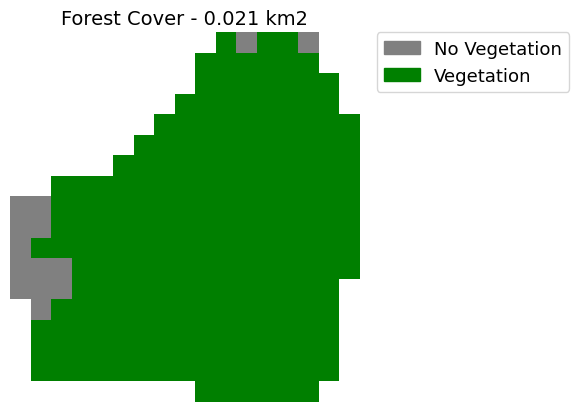

In [23]:
#ndvi_data = ma.getdata(ndvi).copy()
# Apply the nodata mask to the newly classified NDVI data
ndvi_class = np.ma.masked_where(np.ma.getmask(ndvi), 
                                        ndvi_data)
#print(np.unique(ndvi_class))
#np.unique(ndvi_landsat_class)

# Define color map
nbr_colors = ["gray", "g"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Vegetation"]

# Get list of classes
classes = np.unique(ndvi_class)
classes = classes.tolist()

# The mask returns a value of none in the classes. remove that
classes = classes[0:2]

# Plot your data
fig, ax = plt.subplots()
im = ax.imshow(ndvi_class, cmap=nbr_cmap)
ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
"Forest Cover - "+ str(green_area)+" km2",
fontsize=14)
ax.set_axis_off()
plt.show()

In [62]:
 x = [1,2,3]

In [64]:
y = x[1]

In [65]:
y

2

In [66]:
y = y+1

In [67]:
x

[1, 2, 3]